In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


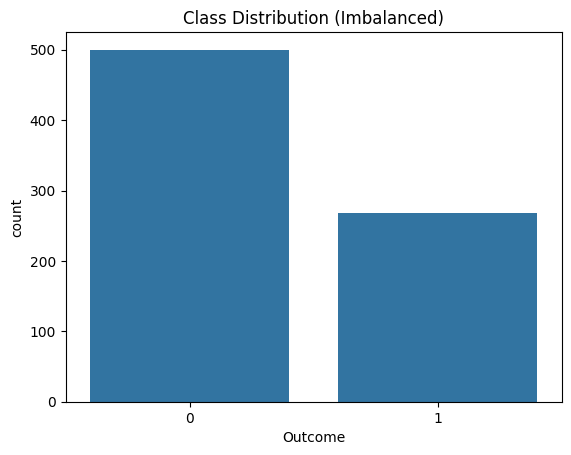

In [2]:
data = pd.read_csv("diabetes.csv")
print("First 5 Rows:")
print(data.head())

print("\nClass Distribution:")
print(data['Outcome'].value_counts())

sns.countplot(x='Outcome', data=data)
plt.title("Class Distribution (Imbalanced)")
plt.show()


Balanced Class Distribution:
Outcome
0    500
1    500
Name: count, dtype: int64


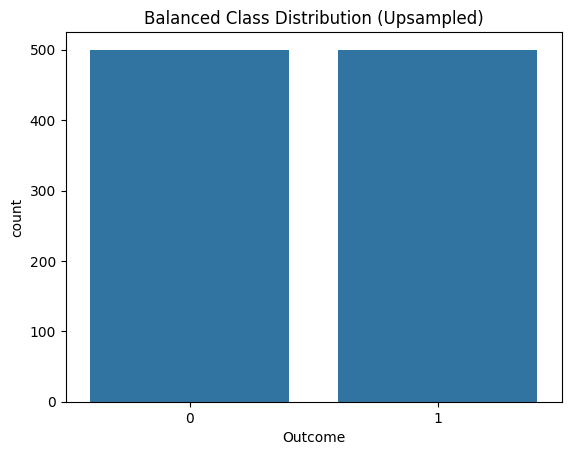

In [3]:
def balance_classes(df, target='Outcome'):
    majority = df[df[target] == 0]
    minority = df[df[target] == 1]

    minority_upsampled = resample(
        minority,
        replace=True,
        n_samples=len(majority),
        random_state=42
    )

    balanced_df = pd.concat([majority, minority_upsampled])
    return balanced_df

balanced_data = balance_classes(data)

print("\nBalanced Class Distribution:")
print(balanced_data['Outcome'].value_counts())

sns.countplot(x='Outcome', data=balanced_data)
plt.title("Balanced Class Distribution (Upsampled)")
plt.show()

In [4]:
X = balanced_data.drop("Outcome", axis=1)
y = balanced_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nAccuracy:")
    print(f"{accuracy_score(y_test, y_pred):.4f}")

print("\n=== MODEL PERFORMANCE (Balanced Data) ===")
evaluate_model(X_train, X_test, y_train, y_test)


=== MODEL PERFORMANCE (Balanced Data) ===

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        96
           1       0.79      0.78      0.78       104

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200


Confusion Matrix:
[[74 22]
 [23 81]]

Accuracy:
0.7750


In [6]:
def stratified_kfold_cv(X, y, k=5):
    skf = StratifiedKFold(n_splits=k)
    model = LogisticRegression(max_iter=2000)

    fold = 1
    for train_idx, test_idx in skf.split(X, y):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_tr, y_tr)
        score = model.score(X_te, y_te)
        print(f"Fold {fold} Accuracy: {score:.4f}")
        fold += 1

print("\n=== Stratified K-Fold Cross Validation ===")
stratified_kfold_cv(X, y)


=== Stratified K-Fold Cross Validation ===
Fold 1 Accuracy: 0.7200
Fold 2 Accuracy: 0.6800
Fold 3 Accuracy: 0.7350
Fold 4 Accuracy: 0.7850
Fold 5 Accuracy: 0.7350



Distribution by Age Group and Outcome:
AgeGroup  Outcome
20–30     0          327
          1          163
30–40     0           81
          1          142
40–50     0           49
          1          124
50–60     0           23
          1           63
60+       0           20
          1            8
dtype: int64


/tmp/ipython-input-4011390477.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(balanced_data.groupby(["AgeGroup", "Outcome"]).size())


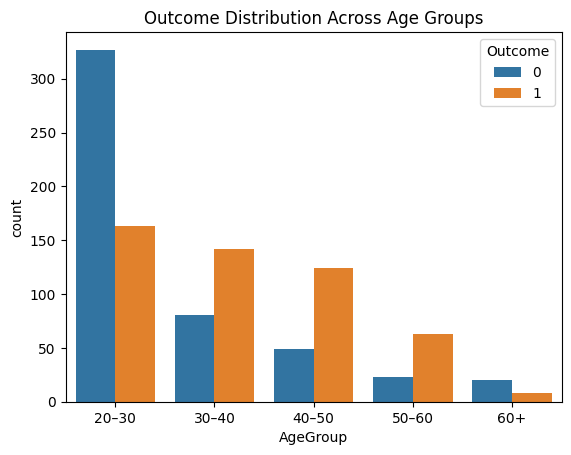

In [7]:
balanced_data["AgeGroup"] = pd.cut(
    balanced_data["Age"],
    bins=[20, 30, 40, 50, 60, 100],
    labels=["20–30", "30–40", "40–50", "50–60", "60+"]
)

print("\nDistribution by Age Group and Outcome:")
print(balanced_data.groupby(["AgeGroup", "Outcome"]).size())

sns.countplot(x="AgeGroup", hue="Outcome", data=balanced_data)
plt.title("Outcome Distribution Across Age Groups")
plt.show()

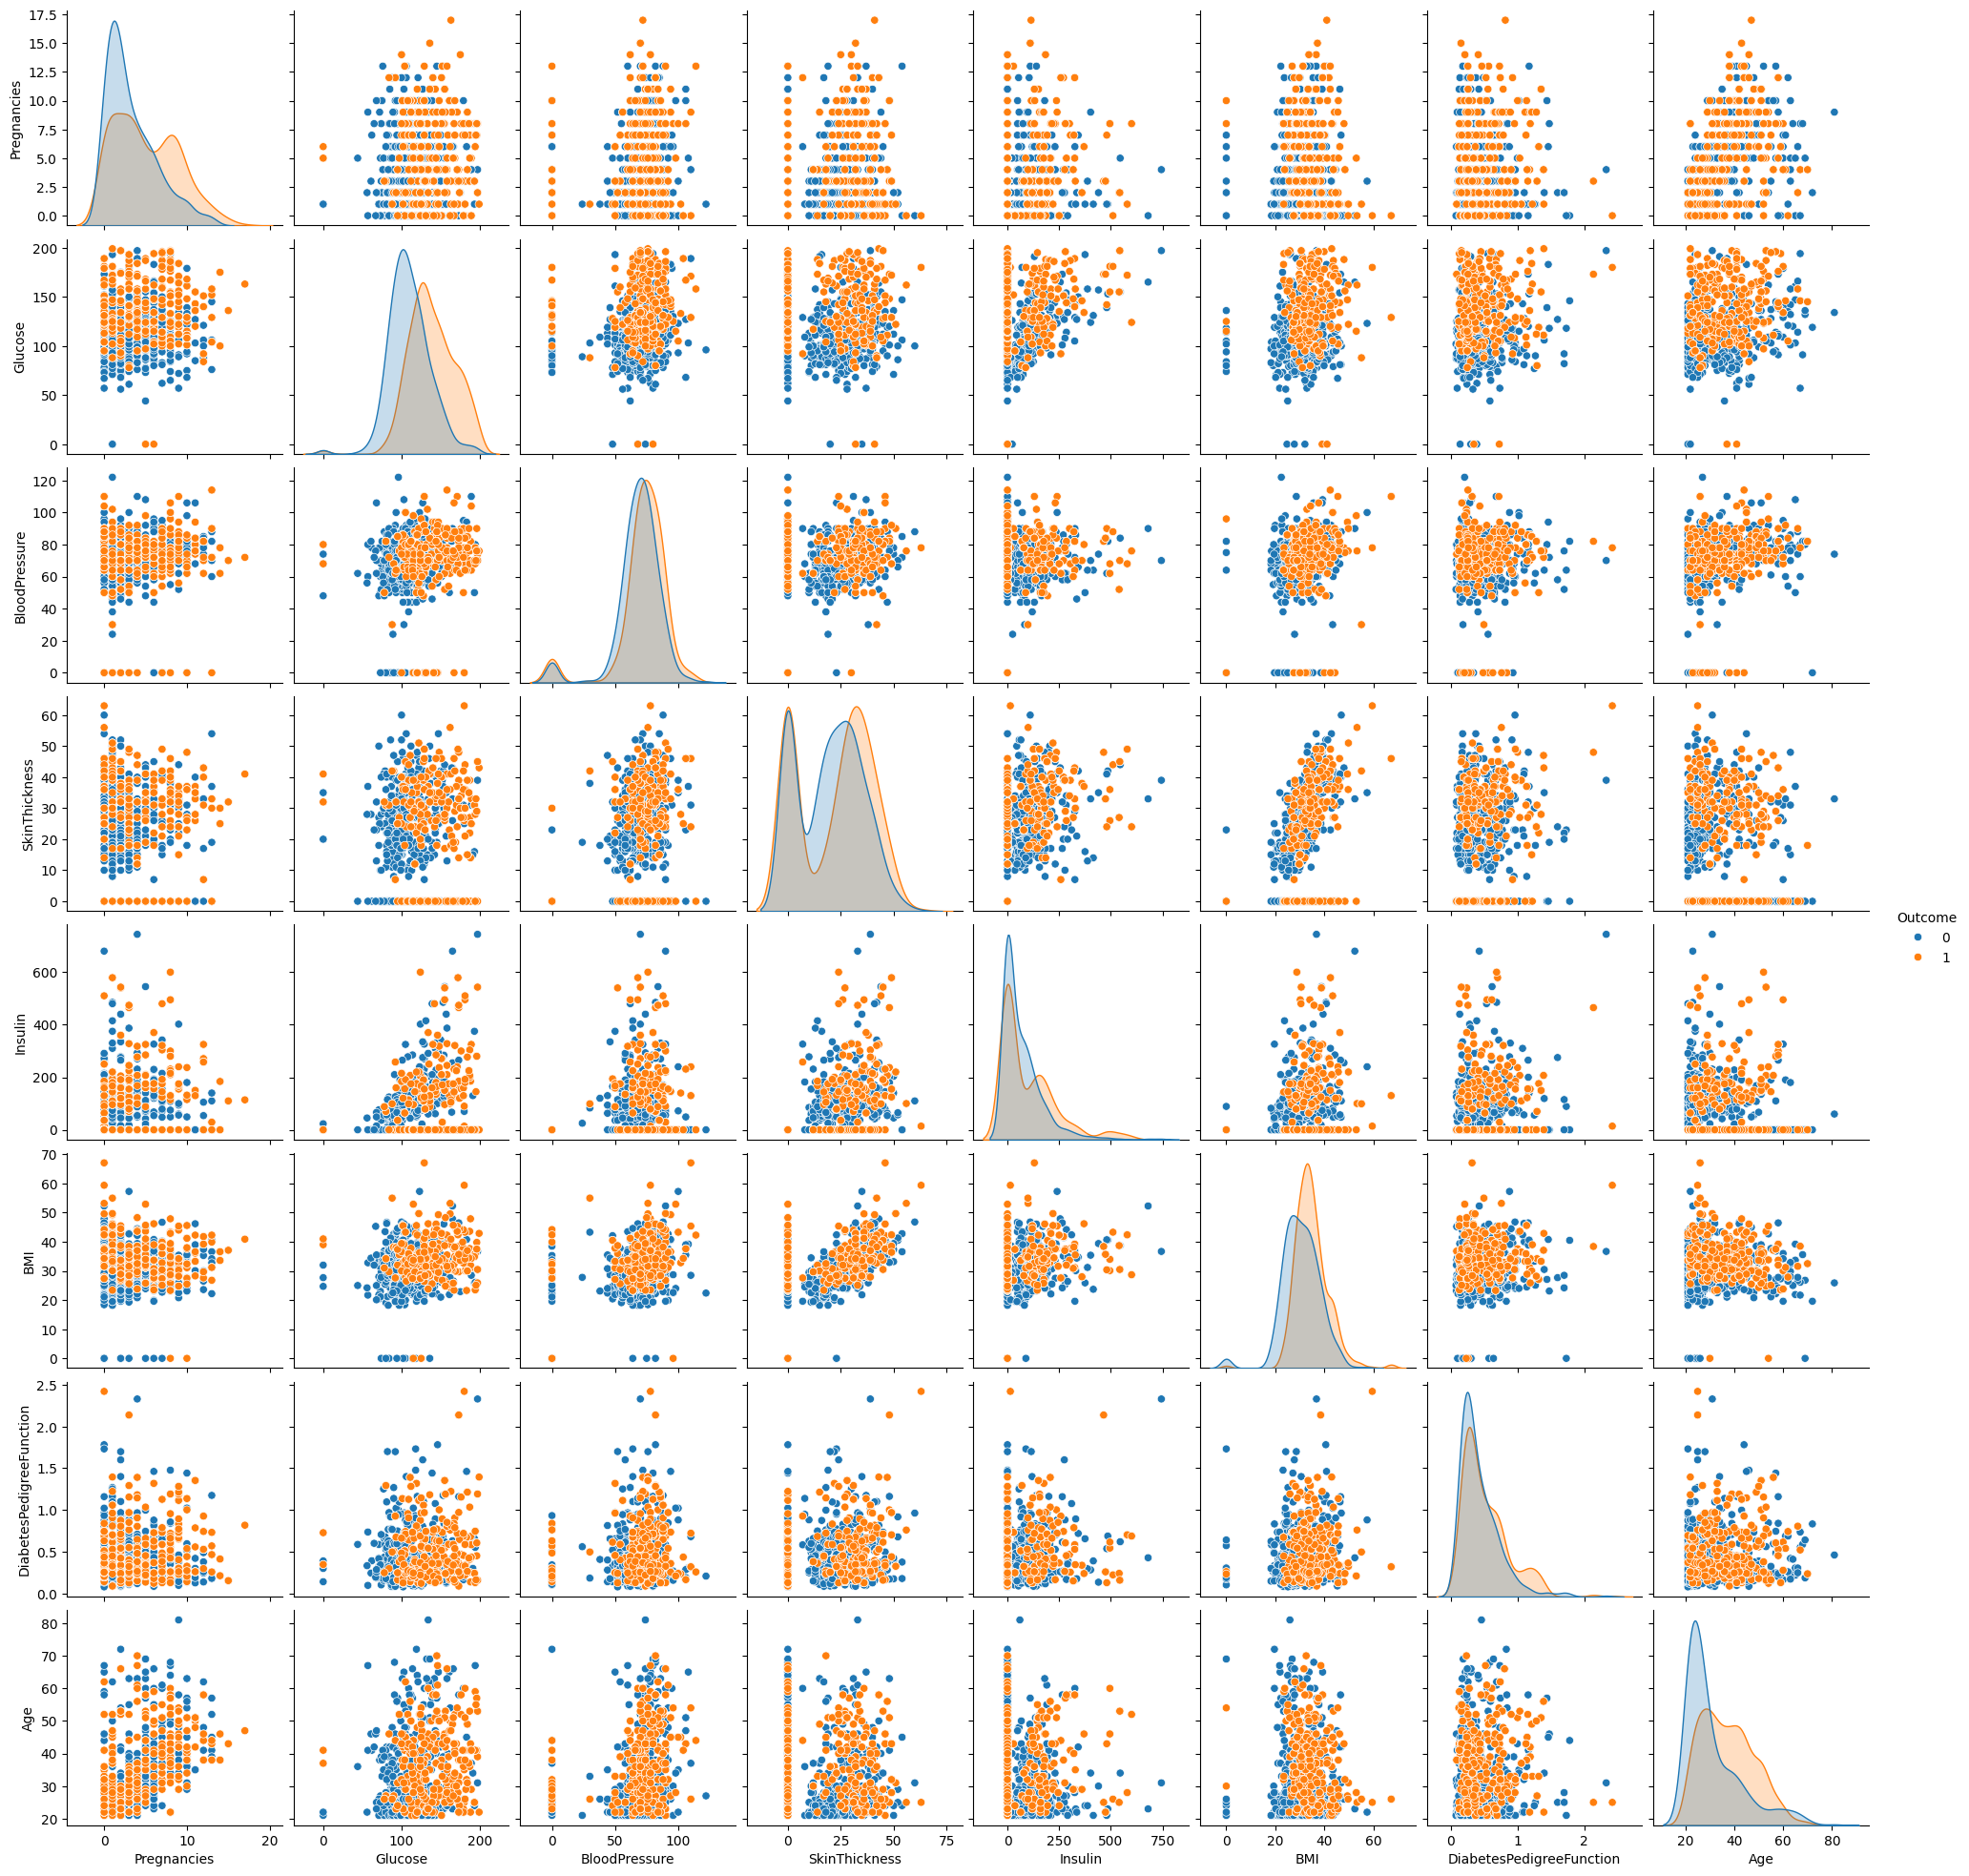

In [8]:
sns.pairplot(balanced_data, hue="Outcome")
plt.show()

In [9]:
print("""
CONCLUSION:
1. The original dataset was imbalanced with far fewer diabetic cases.
2. After balancing via upsampling, the classes became equal.
3. Logistic Regression improved performance on the balanced dataset.
4. Stratified K-Fold showed stable accuracy across folds.
5. Age group analysis indicates diabetes increases with age.
6. Pair plots show relationships between glucose, BMI, age, and diabetes.
""")



CONCLUSION:
1. The original dataset was imbalanced with far fewer diabetic cases.
2. After balancing via upsampling, the classes became equal.
3. Logistic Regression improved performance on the balanced dataset.
4. Stratified K-Fold showed stable accuracy across folds.
5. Age group analysis indicates diabetes increases with age.
6. Pair plots show relationships between glucose, BMI, age, and diabetes.

